<a href="https://colab.research.google.com/github/wiredgabrielsilva/CHECKPOINT-IA-4SIA/blob/main/CHECKPOINT_4SIA_RM84895_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{'m00': 22775.0, 'm10': 13939240.0, 'm01': 9105816.333333332, 'm20': 8572693562.5, 'm11': 5573133292.666666, 'm02': 3681906344.1666665, 'm30': 5297401393906.0, 'm21': 3427498982017.033, 'm12': 2253476559519.1665, 'm03': 1505074101095.1, 'mu20': 41303363.7030735, 'mu11': -2130.6594944000244, 'mu02': 41252508.978957176, 'mu30': 383452.8115234375, 'mu21': -1069026.9143161774, 'mu12': -383886.9241256714, 'mu03': 1061946.0515136719, 'nu20': 0.07962852117842252, 'nu11': -4.107686383451002e-06, 'nu02': 0.07953047864354737, 'nu30': 4.898532144968089e-06, 'nu21': -1.3656602706363949e-05, 'nu12': -4.904077845697547e-06, 'nu03': 1.3566146115592382e-05}
{'m00': 22525.0, 'm10': 2451844.0, 'm01': 2997475.5, 'm20': 307254906.1666666, 'm11': 326271680.75, 'm02': 439265888.6666666, 'm30': 42233190657.0, 'm21': 40885111162.083336, 'm12': 47813638586.916664, 'm03': 69203669734.75, 'mu20': 40371931.678941876, 'mu11': -3228.0101332068443, 'mu02': 40382009.7276988, 'mu30': -436648.9334793091, 'mu21': -16024

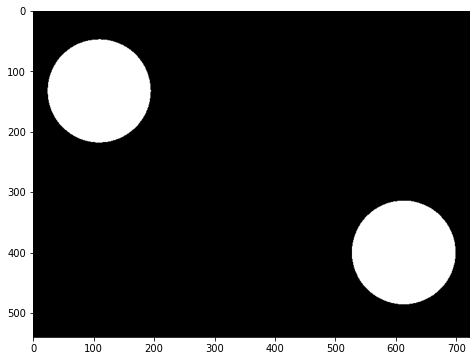

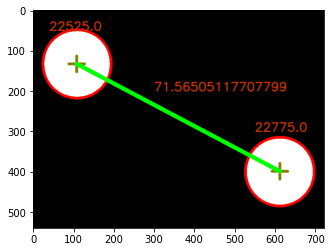

In [ ]:
%matplotlib inline 
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

#Lendo a imagem
img = cv2.imread("/content/circulo.PNG")
bolinha = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
bolinhaHSV = cv2.cvtColor(bolinha, cv2.COLOR_RGB2HSV)


#1 CIRCULO

#Range de cores
image_lower_hsv = np.array([0, 90, 100])  
image_upper_hsv = np.array([7, 255, 255])
image_lower_hsv2 = np.array([30,150,90])
image_upper_hsv2 = np.array([100,200,235])

#Mascara
mask_hsv = cv2.inRange(bolinhaHSV, image_lower_hsv, image_upper_hsv)
mask_hsv2 = cv2.inRange(bolinhaHSV, image_lower_hsv2, image_upper_hsv2)
mask_final = cv2.bitwise_or(mask_hsv,mask_hsv2)



# realizando o contorno da imagem
contornos, _ = cv2.findContours(mask_final, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

# para desenhar o contorno primeiro faz uma copia da imagem 

mask_rgb = cv2.cvtColor(mask_final, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"
cv2.drawContours(contornos_img, contornos, -1, [255,0,0], 5);
plt.figure(figsize=(8,6))

cnt = contornos[0]
cnt2 = contornos[1]
M=cv2.moments(cnt)
M2 = cv2.moments(cnt2)
print(M)
print(M2)

#Calculo de massa
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])

print("centro de massa na possição: ",cx, cy)
print("centro de massa na posicao: ", cx2, cy2)
#new
size = 20
color = (128,128,0)
cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)
cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)

#calculo da area
areaRed = cv2.contourArea(cnt)
areaBlue = cv2.contourArea(cnt2)
print(areaRed)
print(areaBlue)

#Angulo 
#float angle = atan2(p1.y - p2.y, p1.x - p2.x);

# Para escrever vamos definir uma fonte 
font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (550,300)
cv2.putText(contornos_img, str(areaRed), origem, font,1,(200,50,0),2,cv2.LINE_AA)

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy2 , cx2
origem2 = (40,50)
cv2.putText(contornos_img, str(areaBlue), origem2, font,1,(200,50,0),2,cv2.LINE_AA)

#Calculo Angulo
font = cv2.FONT_HERSHEY_SIMPLEX
angle = math.atan2(cy, cy2) * 180 / math.pi #????????????
origem2 = (300,200)
cv2.putText(contornos_img, str(angle), origem2, font,1,(200,50,0),2,cv2.LINE_AA)

#desenhar a linha
inicioLinhaRed = 612,399
inicioLinhaBlue = 108,133
color = (0, 255, 0)
cv2.line(contornos_img, inicioLinhaBlue, inicioLinhaRed,color, 10)

plt.imshow(mask_rgb);
plt.show()
plt.imshow(contornos_img)
plt.show()
